## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
import numpy as np

In [2]:
#from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


### Find no.of samples are there in training and test datasets

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
""

### Find dimensions of an image in the dataset

In [7]:
x_train[0:1].shape

(1, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#fixing the num of classed to 10 as there are 10 classes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)   
y_test = keras.utils.to_categorical(y_test, num_classes) 

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(60000, 784)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 784)      # Images are flattended out into a vector of 784 elements
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255

In [12]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [20]:
model = Sequential()
# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [21]:
epochs =10
batch_size = 256
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 68us/step - loss: 0.4909 - acc: 0.8275 - val_loss: 0.3657 - val_acc: 0.8675
Epoch 2/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.3045 - acc: 0.8904 - val_loss: 0.3137 - val_acc: 0.8865
Epoch 3/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.2521 - acc: 0.9073 - val_loss: 0.2809 - val_acc: 0.8993
Epoch 4/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.2109 - acc: 0.9229 - val_loss: 0.2672 - val_acc: 0.9027
Epoch 5/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.1793 - acc: 0.9346 - val_loss: 0.2479 - val_acc: 0.9062
Epoch 6/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.1509 - acc: 0.9456 - val_loss: 0.2635 - val_acc: 0.9065
Epoch 7/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.1253 - acc: 0.9547 - val_loss: 0.2635 - val_acc:

model accuracy : 0.9093


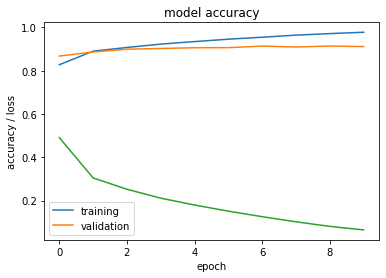

In [22]:
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [30]:
model2 = Sequential()
# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.5316 - acc: 0.8131 - val_loss: 0.3505 - val_acc: 0.8760
Epoch 2/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.3288 - acc: 0.8824 - val_loss: 0.2990 - val_acc: 0.8958
Epoch 3/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.2840 - acc: 0.8992 - val_loss: 0.2711 - val_acc: 0.9053
Epoch 4/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.2539 - acc: 0.9080 - val_loss: 0.2671 - val_acc: 0.9017
Epoch 5/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.2305 - acc: 0.9149 - val_loss: 0.2485 - val_acc: 0.9083
Epoch 6/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.2108 - acc: 0.9228 - val_loss: 0.2282 - val_acc: 0.9173
Epoch 7/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.1922 - acc: 0.9300 - val_loss: 0.2291 - val_acc:

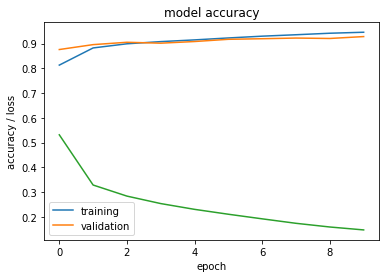

In [31]:
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model2.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

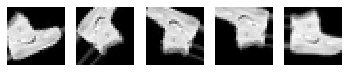

In [34]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [38]:
history = model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  11/1875 [..............................] - ETA: 23s - loss: 0.5679 - acc: 0.7472

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 22s 12ms/step - loss: 0.5739 - acc: 0.7901 - val_loss: 0.4974 - val_acc: 0.8236
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5400 - acc: 0.8011 - val_loss: 0.4752 - val_acc: 0.8325
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5221 - acc: 0.8069 - val_loss: 0.5074 - val_acc: 0.8288
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5063 - acc: 0.8146 - val_loss: 0.4895 - val_acc: 0.8278
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4912 - acc: 0.8196 - val_loss: 0.4620 - val_acc: 0.8386
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4868 - acc: 0.8199 - val_loss: 0.4606 - val_acc: 0.8319
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4827 - acc: 0.8214 - val_loss: 0.4641 - val_acc: 0.8356
Epoch 8/10
1875/1875 [==============================] - 21s

###  Report the final train and validation accuracy

model accuracy : 0.847


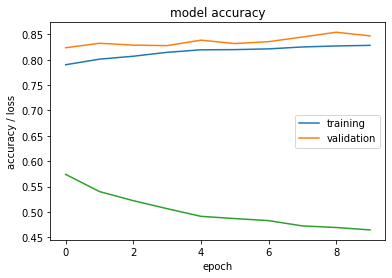

In [39]:
loss,accuracy  = model2.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils


### **Load CIFAR10 dataset**

In [41]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


In [44]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

Using matplotlib backend: agg


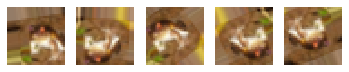

In [57]:
%matplotlib 
from matplotlib import pyplot as plt
gen = data_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()